In [11]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.pyplot import figure
mpl.rc('font', family='Liberation Sans')
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [12]:
def bootstrap(data, num_iterations):
    boot_means = []
    for _ in range(num_iterations):
        num_samples = len(data.dropna())
        try:
            sample = np.random.choice(data.dropna(), size=num_samples, replace=True)
            boot_means.append(np.mean(sample))
        except ValueError:
            boot_means.append(np.nan)
    return boot_means

def ci_bootstrap(path_to_data, low_lim, high_lim, num_iterations = 1000):
    df = pd.read_csv(path_to_data, index_col=0)
    bootstrap_results = {row: bootstrap(df.loc[row], num_iterations) for row in df.index}
    quantiles = {row: (np.percentile(bootstrap_results[row], low_lim), np.percentile(bootstrap_results[row], high_lim)) for row in df.index}
    quantiles_df = pd.DataFrame(quantiles, index=['low_ci', 'high_ci']).T
    return quantiles_df

In [13]:
def plot_dv(path_to_data, low_lim, high_lim, num_iterations, ax):
    colors =  ['#41558c', '#E89818', '#CF202A']
    differences = pd.read_csv(path_to_data, index_col=0)[-8:6]
    differences.mean(axis=1).plot(color=colors[0], ax=ax)
    ci_boots = ci_bootstrap(path_to_data, low_lim, high_lim, num_iterations)[-8:6]
    ax.axvline(x=0, linestyle='dotted', color=colors[2])
    ax.axhline(y=0, linestyle='dotted', color=colors[2])
    ax.fill_between(x=differences.index,
                 y1=ci_boots.high_ci,
                 y2=ci_boots.low_ci,
                     color=colors[1], alpha=0.2)
    ax.yaxis.set_major_formatter('£{x:1.0f}')
    ax.grid(linestyle='--', color='k', alpha=0.1, zorder=0)
    ax.yaxis.set_major_locator(plt.MaxNLocator(6))
    plt.tight_layout()
    sns.despine()

In [14]:
def plot_vg(path_to_data, path_to_wvar, ax):
    colors =  ['#41558c', '#E89818', '#CF202A']
    differences = pd.read_csv(path_to_data, index_col=0)[-8:6]
    wvar = pd.read_csv(path_to_wvar, index_col=0)[-8:6]
    differences.mean(axis=1).plot(color=colors[0], ax=ax)
    bvar = differences.var(axis=1)
    total_var = pd.concat([wvar, bvar], axis=1).sum(axis=1)
    row_n = differences.count(axis=1)
    total_se = (total_var/row_n).apply(math.sqrt)
    ax.axvline(x=0, linestyle='dotted', color=colors[2])
    ax.axhline(y=0, linestyle='dotted', color=colors[2])
    ax.fill_between(x=differences.index,
                 y1=differences.mean(axis=1) + (1.96*total_se),
                 y2=differences.mean(axis=1) - (1.96*total_se),
                     color=colors[2], alpha=0.2)
    ax.yaxis.set_major_formatter('£{x:1.0f}')
    ax.grid(linestyle='--', color='k', alpha=0.1, zorder=0)
    ax.yaxis.set_major_locator(plt.MaxNLocator(6))
    plt.tight_layout()
    sns.despine()

In [15]:
def plot(path_to_data, ax):
    colors =  ['#41558c', '#E89818', '#CF202A']
    differences = pd.read_csv(path_to_data, index_col=0)[-8:6]
    differences.mean(axis=1).plot(color=colors[0], ax=ax)
    sd = differences.std(axis=1)
    row_n = differences.count(axis=1)
    ax.axvline(x=0, linestyle='dotted', color=colors[2])
    ax.axhline(y=0, linestyle='dotted', color=colors[2])
    ax.fill_between(x=differences.index,
                 y1=differences.mean(axis=1) + (1.96*(sd/row_n.apply(math.sqrt))),
                 y2=differences.mean(axis=1) - (1.96*(sd/row_n.apply(math.sqrt))),
                     color=colors[0], alpha=0.2)
    ax.yaxis.set_major_formatter('£{x:1.0f}')
    ax.grid(linestyle='--', color='k', alpha=0.1, zorder=0)
    ax.yaxis.set_major_locator(plt.MaxNLocator(6))
    plt.tight_layout()
    sns.despine()

In [ ]:
path1 = '../outputs/w_diffs_ind_inc_deflated_hi.csv'
path2 = '../outputs/w_diffs_ind_inc_deflated_mhi.csv'
path3 = '../outputs/w_diffs_ind_inc_deflated_mli.csv'
path4 = '../outputs/w_diffs_ind_inc_deflated_li.csv'

varname = 'Ind. Income Deflated'
mpl.rc('font', family='Liberation Sans')


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2, figsize=(12, 7),
                        layout="constrained")
custom_ylim = (-500, 200)
plt.setp(((ax1, ax2), (ax3, ax4)), ylim=custom_ylim)
plot(path1, ax1)
plot(path2, ax2)
plot(path3, ax3)
plot(path4, ax4)
ax1.set_ylabel(' Average Treatment Effect \n' + varname)
ax3.set_ylabel(' Average Treatment Effect \n' + varname)
ax1.set_xlabel('Treatment Time ($t$)\n  (High Intensity)  ', fontsize=9)
ax2.set_xlabel(' Treatment Time ($t$) \n(Medium High Intensity)', fontsize=9)
ax3.set_xlabel('Treatment Time ($t$)\n(Medium Low Intensity)', fontsize=9)
ax4.set_xlabel('Treatment Time ($t$)\n  (Low Intensity)  ', fontsize=9)
min_y = 0
max_y = 0
for ax, letter in zip([ax1, ax2, ax3, ax4], ['a.', 'b.', 'c.', 'd.']):
    ax.set_title(letter, loc='left', fontsize=16)

In [ ]:
path1 = '../outputs/w_diffs_ind_inc_deflated_hi.csv'
path2 = '../outputs/w_diffs_ind_inc_deflated_mhi.csv'
path3 = '../outputs/w_diffs_ind_inc_deflated_mli.csv'
path4 = '../outputs/w_diffs_ind_inc_deflated_li.csv'

varpath1 = '../outputs/boots_vars_ind_inc_deflated_hi.csv'
varpath2 = '../outputs/boots_vars_ind_inc_deflated_mhi.csv'
varpath3 = '../outputs/boots_vars_ind_inc_deflated_mli.csv'
varpath4 = '../outputs/boots_vars_ind_inc_deflated_li.csv'

varname = 'Ind. Income Deflated'
mpl.rc('font', family='Liberation Sans')


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2, figsize=(12, 7),
                        layout="constrained")
custom_ylim = (-500, 200)
plt.setp(((ax1, ax2), (ax3, ax4)), ylim=custom_ylim)
plot_vg(path1,varpath1, ax1)
plot_vg(path2,varpath2, ax2)
plot_vg(path3,varpath3, ax3)
plot_vg(path4,varpath4, ax4)
ax1.set_ylabel(' Average Treatment Effect \n' + varname)
ax3.set_ylabel(' Average Treatment Effect \n' + varname)
ax1.set_xlabel('Treatment Time ($t$)\n  (High Intensity)  ', fontsize=9)
ax2.set_xlabel(' Treatment Time ($t$) \n(Medium High Intensity)', fontsize=9)
ax3.set_xlabel('Treatment Time ($t$)\n(Medium Low Intensity)', fontsize=9)
ax4.set_xlabel('Treatment Time ($t$)\n  (Low Intensity)  ', fontsize=9)
min_y = 0
max_y = 0
for ax, letter in zip([ax1, ax2, ax3, ax4], ['a.', 'b.', 'c.', 'd.']):
    ax.set_title(letter, loc='left', fontsize=16)

In [ ]:
fig, ax = plt.subplots()
plot_dv(path1, 2.5, 97.5, 1000, ax)
plot_vg(path1,varpath1, ax)
plot(path1, ax)


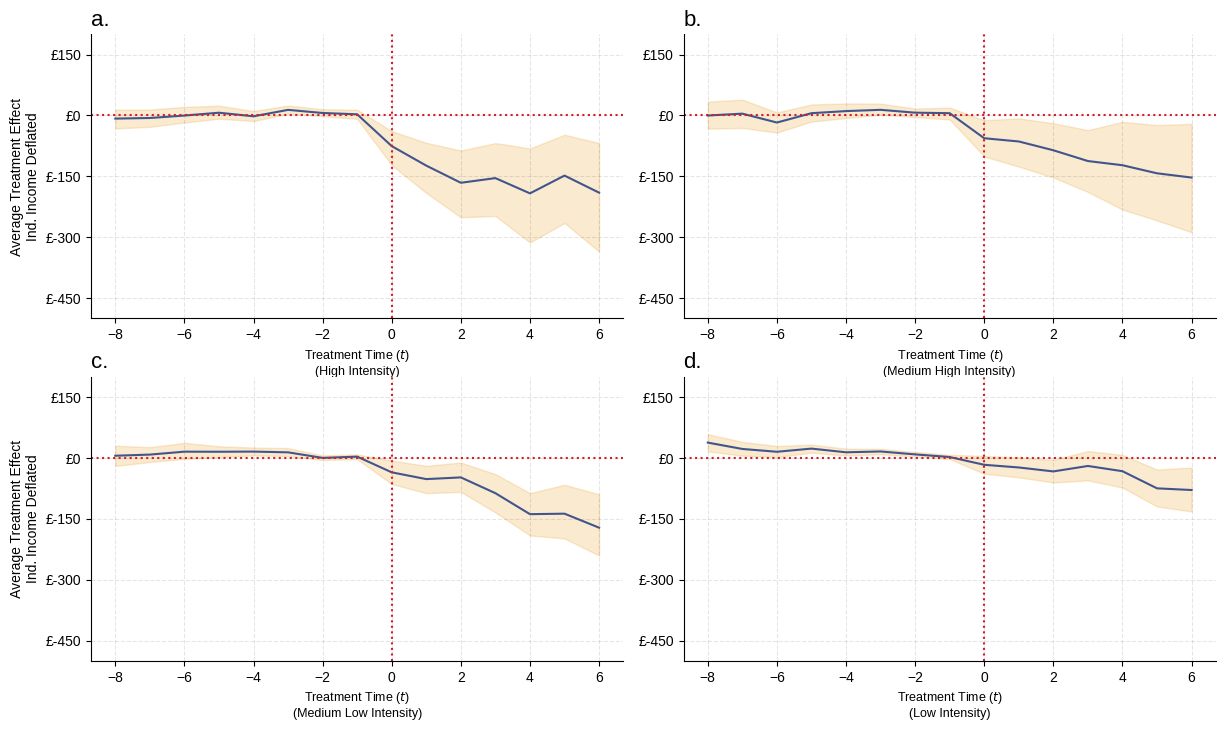

In [16]:
path1 = '../outputs/w_diffs_ind_inc_deflated_hi.csv'
path2 = '../outputs/w_diffs_ind_inc_deflated_mhi.csv'
path3 = '../outputs/w_diffs_ind_inc_deflated_mli.csv'
path4 = '../outputs/w_diffs_ind_inc_deflated_li.csv'

varname = 'Ind. Income Deflated'
mpl.rc('font', family='Liberation Sans')


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2, figsize=(12, 7),
                        layout="constrained")
custom_ylim = (-500, 200)
plt.setp(((ax1, ax2), (ax3, ax4)), ylim=custom_ylim)
plot_dv(path1, 2.5, 97.5, 1000, ax1)
plot_dv(path2, 2.5, 97.5, 1000, ax2)
plot_dv(path3, 2.5, 97.5, 1000, ax3)
plot_dv(path4, 2.5, 97.5, 1000, ax4)
ax1.set_ylabel(' Average Treatment Effect \n' + varname)
ax3.set_ylabel(' Average Treatment Effect \n' + varname)
ax1.set_xlabel('Treatment Time ($t$)\n  (High Intensity)  ', fontsize=9)
ax2.set_xlabel(' Treatment Time ($t$) \n(Medium High Intensity)', fontsize=9)
ax3.set_xlabel('Treatment Time ($t$)\n(Medium Low Intensity)', fontsize=9)
ax4.set_xlabel('Treatment Time ($t$)\n  (Low Intensity)  ', fontsize=9)
min_y = 0
max_y = 0
for ax, letter in zip([ax1, ax2, ax3, ax4], ['a.', 'b.', 'c.', 'd.']):
    ax.set_title(letter, loc='left', fontsize=16)

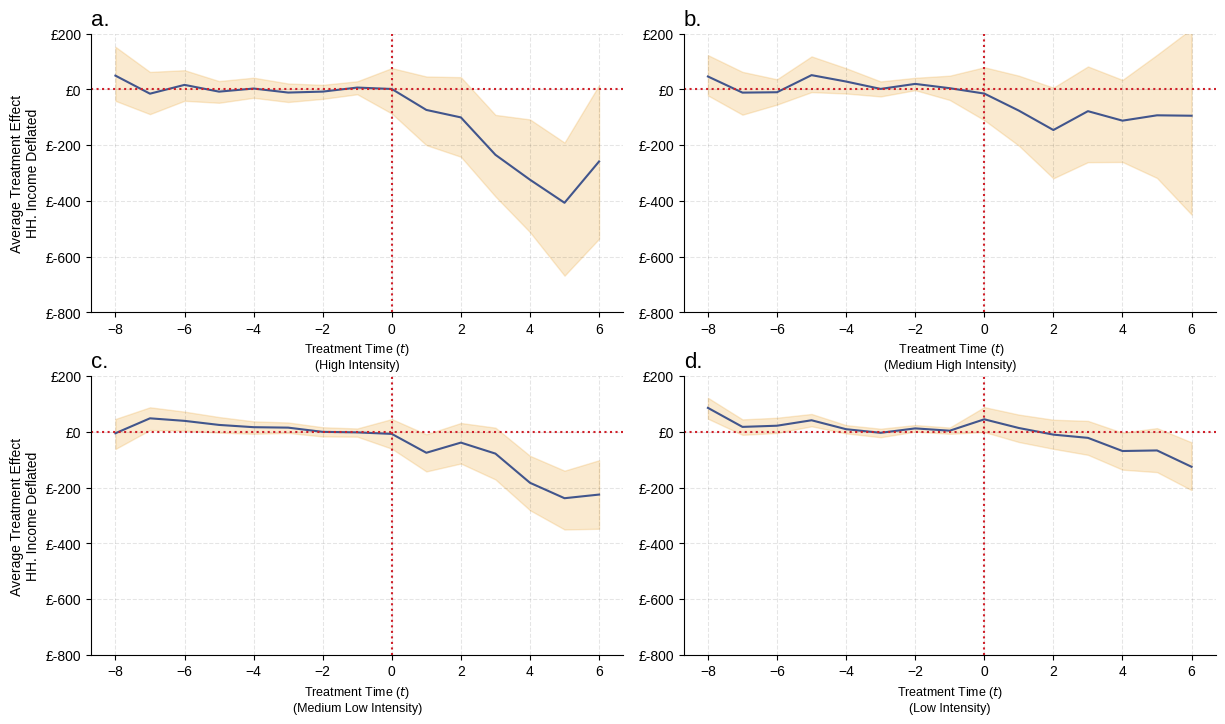

In [17]:
path1 = '../outputs/w_diffs_hh_inc_deflated_hi.csv'
path2 = '../outputs/w_diffs_hh_inc_deflated_mhi.csv'
path3 = '../outputs/w_diffs_hh_inc_deflated_mli.csv'
path4 = '../outputs/w_diffs_hh_inc_deflated_li.csv'

varname = 'HH. Income Deflated'
mpl.rc('font', family='Liberation Sans')


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2, figsize=(12, 7),
                        layout="constrained")
custom_ylim = (-800, 200)
plt.setp(((ax1, ax2), (ax3, ax4)), ylim=custom_ylim)
plot_dv(path1, 2.5, 97.5, 1000, ax1)
plot_dv(path2, 2.5, 97.5, 1000, ax2)
plot_dv(path3, 2.5, 97.5, 1000, ax3)
plot_dv(path4, 2.5, 97.5, 1000, ax4)
ax1.set_ylabel(' Average Treatment Effect \n' + varname)
ax3.set_ylabel(' Average Treatment Effect \n' + varname)
ax1.set_xlabel('Treatment Time ($t$)\n  (High Intensity)  ', fontsize=9)
ax2.set_xlabel(' Treatment Time ($t$) \n(Medium High Intensity)', fontsize=9)
ax3.set_xlabel('Treatment Time ($t$)\n(Medium Low Intensity)', fontsize=9)
ax4.set_xlabel('Treatment Time ($t$)\n  (Low Intensity)  ', fontsize=9)
min_y = 0
max_y = 0
for ax, letter in zip([ax1, ax2, ax3, ax4], ['a.', 'b.', 'c.', 'd.']):
    ax.set_title(letter, loc='left', fontsize=16)

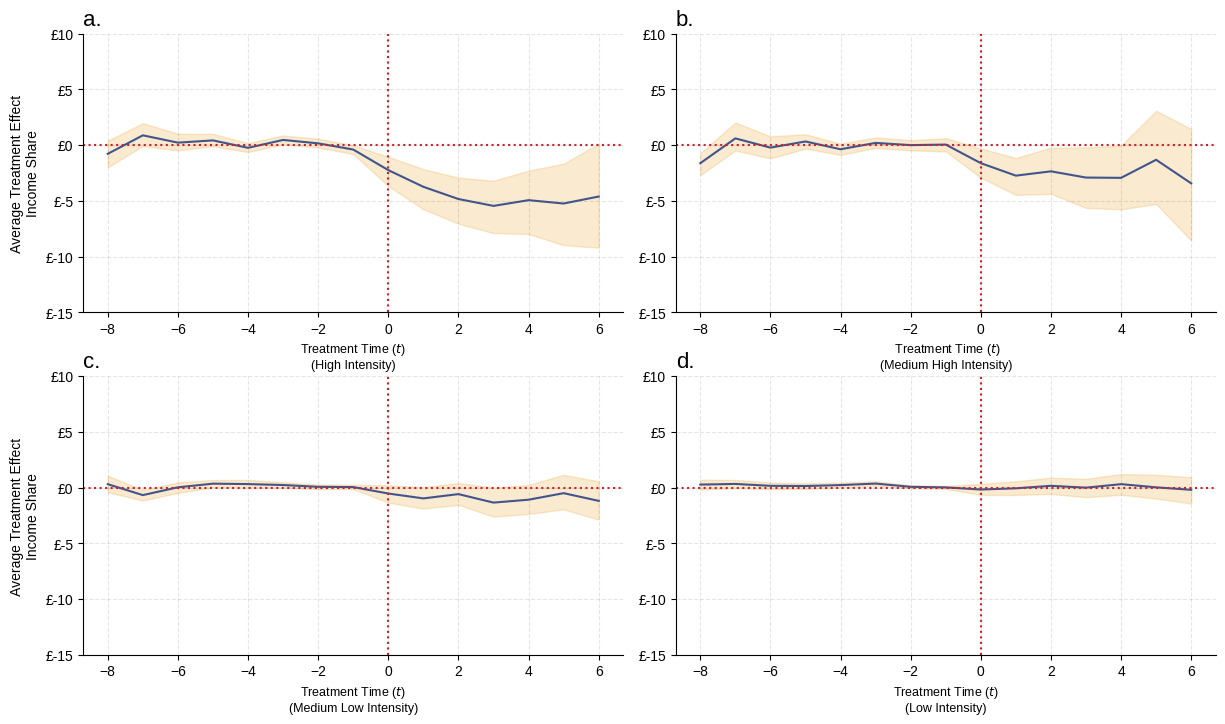

In [18]:
path1 = '../outputs/w_diffs_inc_share_hi.csv'
path2 = '../outputs/w_diffs_inc_share_mhi.csv'
path3 = '../outputs/w_diffs_inc_share_mli.csv'
path4 = '../outputs/w_diffs_inc_share_li.csv'

varname = 'Income Share'
mpl.rc('font', family='Liberation Sans')


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2, figsize=(12, 7),
                        layout="constrained")
custom_ylim = (-15, 10)
plt.setp(((ax1, ax2), (ax3, ax4)), ylim=custom_ylim)
plot_dv(path1, 2.5, 97.5, 1000, ax1)
plot_dv(path2, 2.5, 97.5, 1000, ax2)
plot_dv(path3, 2.5, 97.5, 1000, ax3)
plot_dv(path4, 2.5, 97.5, 1000, ax4)
ax1.set_ylabel(' Average Treatment Effect \n' + varname)
ax3.set_ylabel(' Average Treatment Effect \n' + varname)
ax1.set_xlabel('Treatment Time ($t$)\n  (High Intensity)  ', fontsize=9)
ax2.set_xlabel(' Treatment Time ($t$) \n(Medium High Intensity)', fontsize=9)
ax3.set_xlabel('Treatment Time ($t$)\n(Medium Low Intensity)', fontsize=9)
ax4.set_xlabel('Treatment Time ($t$)\n  (Low Intensity)  ', fontsize=9)
min_y = 0
max_y = 0
for ax, letter in zip([ax1, ax2, ax3, ax4], ['a.', 'b.', 'c.', 'd.']):
    ax.set_title(letter, loc='left', fontsize=16)

In [ ]:
mpl.rc('font', family='Liberation Sans')

figure(figsize=(14, 7))
differences = pd.read_csv('./robust_test/synths_ind_inc_deflated_mhi_dnd.csv', index_col=0)[:5]
ax = differences.mean(axis=1).plot(color='magenta')
plt.axvline(x=0, linestyle='--', color='#001c54', alpha=1, linewidth=1.25)
plt.axhline(y=0, color='#E89818', linestyle='-')
plt.fill_between(x=differences.index,
                 y1=differences.mean(axis=1) + (1.96*(differences.std(axis=1)/differences.count(axis=1).apply(math.sqrt))),
                 y2=differences.mean(axis=1) - (1.96*(differences.std(axis=1)/differences.count(axis=1).apply(math.sqrt))),
                     color='red', alpha=0.1)
differences = pd.read_csv('./robust_test/treats_ind_inc_deflated_mhi_dnd.csv', index_col=0)[:5]
ax = differences.mean(axis=1).plot(color='blue')
plt.axvline(x=0, linestyle='--', color='#E89818', alpha=1, linewidth=1.25)
plt.xlabel('Years', fontsize=16)
plt.ylabel('Personal Income deflated', fontsize=16)
plt.axhline(y=0, color='#001c54', linestyle='-')
plt.fill_between(x=differences.index,
                 y1=differences.mean(axis=1) + (1.96*(differences.std(axis=1)/differences.count(axis=1).apply(math.sqrt))),
                 y2=differences.mean(axis=1) - (1.96*(differences.std(axis=1)/differences.count(axis=1).apply(math.sqrt))),
                     color='blue', alpha=0.1)
#ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()